In [11]:
import mesa
import math
import numpy as np
from model import Evacuation
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
from tqdm import tqdm

In [8]:
'''
Zbieramy dane: czas ewakuacji
Evacuation(n=10, width=20, height=10, door_width = 4, seed=10, model_type = "BNE_mixed_SR", p_BNE = 100)
'''
######czas ewakuacji dla ustalonego otoczenia i liczby pieszych w zależności od algorytmu (box ploty) ###
#BNE

def batch_run(params):

    if __name__ == '__main__':
        results = mesa.batch_run(
            Evacuation,
            parameters=params,
            iterations=50,
            max_steps=500,
            number_processes=8,
            data_collection_period=-1,
            display_progress=1
        )

    results_df = pd.DataFrame(results)
    ev_times = results_df.groupby("RunId").first().Step
    return ev_times

In [12]:
results_box_bne = batch_run({"n": 1000 , "width": 68, "height": 20, "door_width": 6, "seed": None, "model_type": "BNE_mixed_SR", "p_BNE": 100})

  0%|          | 0/50 [00:00<?, ?it/s]

In [21]:
results_box_rf = batch_run({"n": 1000 , "width": 68, "height": 20, "door_width": 6, "seed": None, "model_type": "BNE_mixed_RF", "p_BNE": 0})

  0%|          | 0/50 [00:00<?, ?it/s]

In [13]:
results_box_sr = batch_run({"n": 1000 , "width": 68, "height": 20, "door_width": 6, "seed": None, "model_type": "BNE_mixed_SR", "p_BNE": 0})

  0%|          | 0/50 [00:00<?, ?it/s]

([<matplotlib.axis.XTick at 0x2998a526330>,
 [Text(0, 0, 'BNE'), Text(1, 0, 'RF'), Text(2, 0, 'SR')])

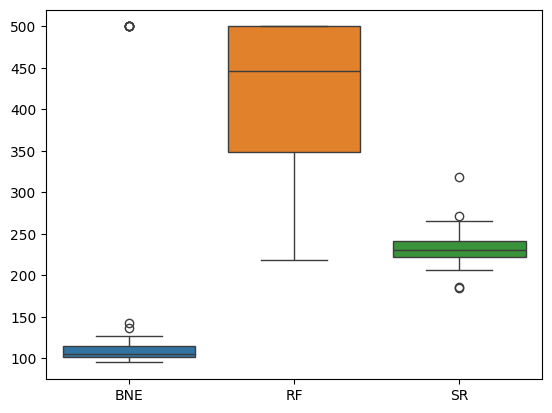

In [22]:
sns.boxplot( np.array([results_box_bne, results_box_rf, results_box_sr]).T)
plt.xticks(np.arange(3), ["BNE", "RF", "SR"])

In [ ]:
algorytmy = [("BNE_mixed_SR", 100), ("BNE_mixed_RF", 0), ("BNE_mixed_SR", 0)]

results = np.zeros((3, 50))

for i, algorytm in enumerate(algorytmy):
    for j in tqdm(range(50)):
        model = Evacuation(n = 1000, width=40, height=10, door_width=2, seed = None, model_type = algorytm[0], p_BNE=algorytm[1])
        step_num=0
        while len(model.agents.get("exited"))>0:
            model.step()
            step_num += 1
        results[i, j] = step_num

  0%|          | 0/50 [05:14<?, ?it/s]


KeyboardInterrupt: 

In [61]:
results

array([[438., 504., 358., 441., 401., 509., 332., 389., 401., 432., 346.,
        370., 342., 492., 431., 513., 524., 342., 344., 329., 432., 394.,
        368., 399., 314., 430., 447., 399., 304., 508., 471., 438., 331.,
        406., 392., 414., 418., 525., 529., 308., 318., 340., 467., 319.,
        428., 406., 375., 419., 490., 314.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   

<Axes: >

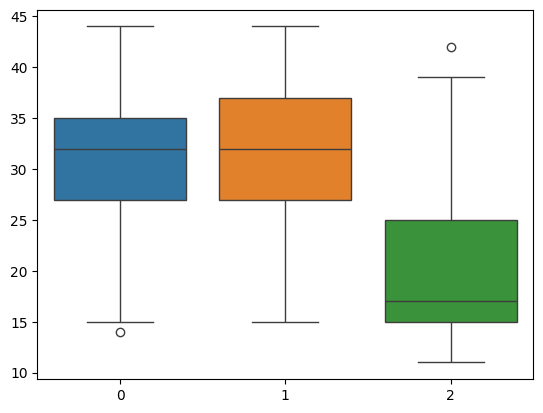

In [ ]:
sns.boxplot(results.T)